### Практикуемся в работе с VK API


1. Скачать список пользователей, состоящих в группе https://vk.com/dormitory8hse. Нарисовать столбчатую диаграмму, показывающую, сколько человек из каких городов состоит в группе.
2. В той же группе скачать 1000 записей со стены. Нарисовать график, показывающий, сколько записей было написано в каждый час. Вывести записи, набравшие наибольшее количество лайков и с наибольшим числом комментариев.
3. Скачать список пользователей, состоящих в группе https://vk.com/hse_university. Нарисовать столбчатую диаграмму, показывающую распределение пользователей по их году рождения. 
4. Найти, сколько в этой группе состоит пользователей, чьим университетом является не Вышка. Нарисовать диаграмму, показывающую распределение этих пользователей по университетам (если все не влезут, то 10 самых частотных университетов).
4. Собрать корпус записей в группе Вышки и комментариев к ним (можно взять первые 10000 записей). Найти самые частотные биграммы в этом корпусе.

In [1]:
import urllib.request
import json

In [2]:
offsets = [0, 1000, 2000, 3000, 4000]
users = set()
for off in offsets:
    req = urllib.request.Request('https://api.vk.com/method/groups.getMembers?group_id=dormitory8hse&v=5.23&offset=' + str(off))
    response = urllib.request.urlopen(req)
    result = response.read().decode('utf-8')
    data = json.loads(result) 
    users = users | set(data['response']['items']) # | здесь - это объединение множеств
len(users)

4961

In [3]:
cities = []
i = 0
for user in users:
    if i > 1000:
        break
    req = urllib.request.Request('https://api.vk.com/method/users.get?v=5.23&user_ids={}&fields=home_town'.format(str(user)))
    response = urllib.request.urlopen(req) # да, так тоже можно, не обязательно делать это с with, как в примере выше
    result = response.read().decode('utf-8')
    data = json.loads(result) 
    if 'home_town' not in (data['response'][0]):
        continue
    cities.append(data['response'][0]['home_town'])
    i += 1
print(len(cities))

1001


In [8]:
cities[:10]

['Ташкент',
 'Ижевск',
 'Бира / Биробиджан / Хабаровск /',
 'Одинцово',
 'Пенза',
 'саранск',
 'Калуга',
 'Красноярск',
 'Ростов-на-Дону',
 'Когалым']

In [9]:
# отфильтровываем случаи, когда город не указан
cities = [city for city in cities if city != '']
len(cities)

534

In [10]:
cities[:5]

['Ташкент', 'Ижевск', 'Бира / Биробиджан / Хабаровск /', 'Одинцово', 'Пенза']

In [11]:
from collections import Counter
cities = Counter(cities)

In [12]:
# берем только те города, в названии которых > 2 букв и которые указали > пользователей

cities = dict(cities)
cities = {c : cities[c] for c in cities if cities[c] > 2 and len(c) > 2} # dict comprehension
cities

{'Moscow': 3,
 'Брянск': 6,
 'Владивосток': 3,
 'Владикавказ': 4,
 'Владимир': 3,
 'Волгоград': 3,
 'Воронеж': 3,
 'Екатеринбург': 9,
 'Ижевск': 9,
 'Иркутск': 4,
 'Казань': 8,
 'Калининград': 3,
 'Караганда': 3,
 'Киров': 12,
 'Кишинёв': 4,
 'Краснодар': 4,
 'Красноярск': 4,
 'Липецк': 3,
 'Москва': 57,
 'Набережные Челны': 6,
 'Нижний Новгород': 9,
 'Нижний Тагил': 3,
 'Новосибирск': 8,
 'Обнинск': 3,
 'Одинцово': 5,
 'Омск': 7,
 'Пермь': 5,
 'Ростов-на-Дону': 5,
 'Рязань': 3,
 'Самара': 6,
 'Санкт-Петербург': 13,
 'Саратов': 6,
 'Тамбов': 5,
 'Ташкент': 17,
 'Тверь': 9,
 'Тирасполь': 3,
 'Тольятти': 5,
 'Тула': 6,
 'Уфа': 4,
 'Чебоксары': 9,
 'Челябинск': 8,
 'москва': 3}

C:\Users\ancatmara\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


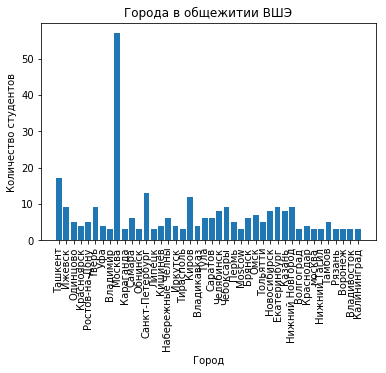

In [13]:
import matplotlib.pyplot as plt

city_nums = [cities[city] for city in cities]  # ось y
city_labs = [city for city in cities]          # ось x
plt.bar(range(len(city_labs)), city_nums)

plt.title('Города в общежитии ВШЭ')
plt.ylabel('Количество студентов')
plt.xlabel('Город')
plt.xticks(range(len(city_labs)), city_labs, rotation=90) # размер делений на оси x, подписи и их ориентация
plt.legend()
plt.show()